In [2]:
# Frequency references for ZPAC
# Lo Frequency Parameters
min_lo = 3
max_lo = 15
num_lo = 6
frex_lo = np.linspace(min_lo, max_lo, num_lo)
print(frex_lo)
# Hi Frequency Parameters
min_hi = 22
max_hi = 42
num_hi = 5
frex_hi = np.linspace(min_hi, max_hi, num_hi)
print(frex_hi)

[ 3.   5.4  7.8 10.2 12.6 15. ]
[22. 27. 32. 37. 42.]


In [3]:
import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels

NDR = pd.read_excel('Raw_NDR_3rdExp.xlsx', 'Sheet2')

NDR_G1_Ver = NDR['Verum_G1']
NDR_G1_Sh = NDR['Sham_G1']
NDR_G1_Ver = NDR_G1_Ver.drop(index=[3,5,8], inplace=False)
NDR_G1_Sh = NDR_G1_Sh.drop(index=[3,5,8], inplace=False)
NDR_G2_Ver = NDR['Verum_G2']
NDR_G2_Sh = NDR['Sham_G2']


zPAC_G1_Ver = np.empty([15,5,6,2])
zPAC_G1_Sh = np.empty([15,5,6,2])
zPAC_G2_Ver = np.empty([15,5,6,2])
zPAC_G2_Sh = np.empty([15,5,6,2])

for a in range(15):
    zPAC_G1_Ver[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/CrossFr/zPAC_V1V5_%s_%s.npy' %('G1_Bursts', a+1))
    zPAC_G1_Sh[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/CrossFr/zPAC_V1V5_%s_%s.npy' %('G1_BSham', a+1))
    zPAC_G2_Ver[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/CrossFr/zPAC_V1V5_%s_%s.npy' %('G2_Bursts', a+1))
    zPAC_G2_Sh[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/CrossFr/zPAC_V1V5_%s_%s.npy' %('G2_BSham', a+1))

print(zPAC_G1_Ver.shape) # Subjects x HiFr x LoFr x 2 Direction of Interaction

zPAC_G1_Ver_avg_0 = np.mean(zPAC_G1_Ver[:,2:,2:,0], axis=(1,2))
zPAC_G1_Sh_avg_0  = np.mean(zPAC_G1_Sh[:,2:,2:,0], axis=(1,2))
zPAC_G1_Ver_avg_0 = np.delete(zPAC_G1_Ver_avg_0, [3,5,8])
zPAC_G1_Sh_avg_0  = np.delete(zPAC_G1_Sh_avg_0, [3,5,8])
zPAC_G2_Ver_avg_0 = np.mean(zPAC_G2_Ver[:,2:,2:,0], axis=(1,2))
zPAC_G2_Sh_avg_0  = np.mean(zPAC_G2_Sh[:,2:,2:,0], axis=(1,2))

zPAC_G1_Ver_avg_1 = np.mean(zPAC_G1_Ver[:,3:4,2:4,1], axis=(1,2))
zPAC_G1_Sh_avg_1  = np.mean(zPAC_G1_Sh[:,3:4,2:4,1], axis=(1,2))
zPAC_G1_Ver_avg_1 = np.delete(zPAC_G1_Ver_avg_1, [3,5,8])
zPAC_G1_Sh_avg_1  = np.delete(zPAC_G1_Sh_avg_1, [3,5,8])
zPAC_G2_Ver_avg_1 = np.mean(zPAC_G2_Ver[:,3:4,2:4,1], axis=(1,2))
zPAC_G2_Sh_avg_1  = np.mean(zPAC_G2_Sh[:,3:4,2:4,1], axis=(1,2))


Psi_G1_Ver = np.empty([2,2,15,4,1000])
Psi_G1_Sh  = np.empty([2,2,15,4,1000])
Psi_G2_Ver = np.empty([2,2,15,4,1000])
Psi_G2_Sh  = np.empty([2,2,15,4,1000])

for a in range(15):
    #Bsl
    Psi_G1_Ver[:,:,a,:,:] = np.load('../../../Documents/3rd_Results/Subjects/Psi/PSI_%s_%s.npy' %('G1_Bursts', a+1))
    Psi_G1_Sh[:,:,a,:,:] = np.load('../../../Documents/3rd_Results/Subjects/Psi/PSI_%s_%s.npy' %('G1_BSham', a+1))
    Psi_G2_Ver[:,:,a,:,:] = np.load('../../../Documents/3rd_Results/Subjects/Psi/PSI_%s_%s.npy' %('G2_Bursts', a+1))    
    Psi_G2_Sh[:,:,a,:,:] = np.load('../../../Documents/3rd_Results/Subjects/Psi/PSI_%s_%s.npy' %('G2_BSham', a+1))
    
print(Psi_G1_Ver.shape) #Psi_G3_P10[1,0,1,3,350:550])#

# Theta Psi
Psi_G1_Ver_The = np.mean(Psi_G1_Ver[1,0,:,0,375:500], axis=1)
Psi_G1_Sh_The  = np.mean(Psi_G1_Sh[1,0,:,0,375:500], axis=1)
Psi_G1_Ver_The = np.delete(Psi_G1_Ver_The, [3,5,8])
Psi_G1_Sh_The  = np.delete(Psi_G1_Sh_The, [3,5,8])
Psi_G2_Ver_The = np.mean(Psi_G2_Ver[1,0,:,0,375:500], axis=1)
Psi_G2_Sh_The  = np.mean(Psi_G2_Sh[1,0,:,0,375:500], axis=1)
# Alpha Psi
Psi_G1_Ver_Alp = np.mean(Psi_G1_Ver[1,0,:,1,375:500], axis=1)
Psi_G1_Sh_Alp  = np.mean(Psi_G1_Sh[1,0,:,1,375:500], axis=1)
Psi_G1_Ver_Alp = np.delete(Psi_G1_Ver_Alp, [3,5,8])
Psi_G1_Sh_Alp  = np.delete(Psi_G1_Sh_Alp, [3,5,8])
Psi_G2_Ver_Alp = np.mean(Psi_G2_Ver[1,0,:,1,375:500], axis=1)
Psi_G2_Sh_Alp  = np.mean(Psi_G2_Sh[1,0,:,1,375:500], axis=1)
# Beta Psi
Psi_G1_Ver_Bet = np.mean(Psi_G1_Ver[1,0,:,2,375:500], axis=1)
Psi_G1_Sh_Bet  = np.mean(Psi_G1_Sh[1,0,:,2,375:500], axis=1)
Psi_G1_Ver_Bet = np.delete(Psi_G1_Ver_Bet, [3,5,8])
Psi_G1_Sh_Bet  = np.delete(Psi_G1_Sh_Bet, [3,5,8])
Psi_G2_Ver_Bet = np.mean(Psi_G2_Ver[1,0,:,2,375:500], axis=1)
Psi_G2_Sh_Bet  = np.mean(Psi_G2_Sh[1,0,:,2,375:500], axis=1)
# Gamma Psi
Psi_G1_Ver_Gam = np.mean(Psi_G1_Ver[1,0,:,3,375:500], axis=1)
Psi_G1_Sh_Gam  = np.mean(Psi_G1_Sh[1,0,:,3,375:500], axis=1)
Psi_G1_Ver_Gam = np.delete(Psi_G1_Ver_Gam, [3,5,8])
Psi_G1_Sh_Gam  = np.delete(Psi_G1_Sh_Gam, [3,5,8])
Psi_G2_Ver_Gam = np.mean(Psi_G2_Ver[1,0,:,3,375:500], axis=1)
Psi_G2_Sh_Gam  = np.mean(Psi_G2_Sh[1,0,:,3,375:500], axis=1)


Itpc_G1_Ver = np.empty([15,2,44,1000], dtype=complex)
Itpc_G1_Sh  = np.empty([15,2,44,1000], dtype=complex)
Itpc_G2_Ver = np.empty([15,2,44,1000], dtype=complex)
Itpc_G2_Sh  = np.empty([15,2,44,1000], dtype=complex)

for a in range(15):
    Itpc_G1_Ver[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/TW/Wave_%s_%s.npy' %('G1_Bursts', a+1))
    Itpc_G1_Sh[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/TW/Wave_%s_%s.npy' %('G1_BSham', a+1))
    Itpc_G2_Ver[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/TW/Wave_%s_%s.npy' %('G2_Bursts', a+1))
    Itpc_G2_Sh[a,:,:,:] = np.load('../../../Documents/3rd_Results/Subjects/TW/Wave_%s_%s.npy' %('G2_BSham', a+1))
    
print(Itpc_G1_Ver.shape)

# Alpha ITPC
Itpc_G1_Ver_Alp = np.mean(abs(Itpc_G1_Ver[:,:,2:5,375:500]), axis=(1,2,3)) # Input: Sub x Ch x frex x time-points
Itpc_G1_Sh_Alp  = np.mean(abs(Itpc_G1_Sh[:,:,2:5,375:500]), axis=(1,2,3))
Itpc_G1_Ver_Alp = np.delete(Itpc_G1_Ver_Alp, [3,5,8])
Itpc_G1_Sh_Alp  = np.delete(Itpc_G1_Sh_Alp, [3,5,8])
Itpc_G2_Ver_Alp = np.mean(abs(Itpc_G2_Ver[:,:,2:5,375:500]), axis=(1,2,3))
Itpc_G2_Sh_Alp  = np.mean(abs(Itpc_G2_Sh[:,:,2:5,375:500]), axis=(1,2,3))

# Beta ITPC
Itpc_G1_Ver_Bet = np.mean(abs(Itpc_G1_Ver[:,:,6:12,375:500]), axis=(1,2,3))
Itpc_G1_Sh_Bet  = np.mean(abs(Itpc_G1_Sh[:,:,6:12,375:500]), axis=(1,2,3))
Itpc_G1_Ver_Bet = np.delete(Itpc_G1_Ver_Bet, [3,5,8])
Itpc_G1_Sh_Bet  = np.delete(Itpc_G1_Sh_Bet, [3,5,8])
Itpc_G2_Ver_Bet = np.mean(abs(Itpc_G2_Ver[:,:,6:12,375:500]), axis=(1,2,3))
Itpc_G2_Sh_Bet  = np.mean(abs(Itpc_G2_Sh[:,:,6:12,375:500]), axis=(1,2,3))

# Gamma ITPC
Itpc_G1_Ver_Gam = np.mean(abs(Itpc_G1_Ver[:,:,13:21,375:500]), axis=(1,2,3))
Itpc_G1_Sh_Gam  = np.mean(abs(Itpc_G1_Sh[:,:,13:21,375:500]), axis=(1,2,3))
Itpc_G1_Ver_Gam = np.delete(Itpc_G1_Ver_Gam, [3,5,8])
Itpc_G1_Sh_Gam  = np.delete(Itpc_G1_Sh_Gam, [3,5,8])
Itpc_G2_Ver_Gam = np.mean(abs(Itpc_G2_Ver[:,:,13:21,375:500]), axis=(1,2,3))
Itpc_G2_Sh_Gam  = np.mean(abs(Itpc_G2_Sh[:,:,13:21,375:500]), axis=(1,2,3))



(15, 5, 6, 2)
(2, 2, 15, 4, 1000)
(15, 2, 44, 1000)


           NDR  SUBJECT       GROUP    V1pV5a    V1aV5p      PSIT      PSIA  \
0    12.897222        1    In-Phase  0.521309  0.918665  0.000590 -0.003315   
1    18.686111        2    In-Phase  0.536456  0.330958  0.001163 -0.001511   
2    35.611111        3    In-Phase -0.010383  0.585688 -0.000431  0.000769   
3    24.141667        4    In-Phase -0.436656 -0.203048  0.000468  0.000837   
4    26.952778        5    In-Phase  0.178178 -0.293745 -0.001233  0.010853   
5    10.955556        6    In-Phase  0.178781 -0.173456 -0.000694 -0.006279   
6    26.875000        7    In-Phase -0.949102 -0.958234 -0.001608 -0.003818   
7    10.855556        8    In-Phase -0.304379 -0.236605 -0.000188  0.002281   
8    21.500000        9    In-Phase -0.599282 -0.360176  0.001577  0.008631   
9    23.816667       10    In-Phase -0.498848 -1.072426 -0.000420  0.000018   
10   20.550000       11    In-Phase -0.540224  0.659060  0.001528  0.000261   
11   22.286111       12    In-Phase -0.406634 -1.104

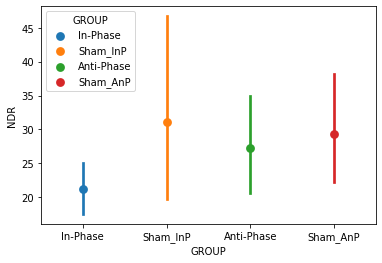

In [4]:
### Complete DataFrame

itpc_alp_all = np.concatenate([Itpc_G1_Ver_Alp, Itpc_G1_Sh_Alp, Itpc_G2_Ver_Alp, Itpc_G2_Sh_Alp], axis=0)
itpca = pd.Series(itpc_alp_all)
itpca = itpca.reset_index(drop=True)
itpc_bet_all = np.concatenate([Itpc_G1_Ver_Bet, Itpc_G1_Sh_Bet, Itpc_G2_Ver_Bet, Itpc_G2_Sh_Bet], axis=0)
itpcb = pd.Series(itpc_bet_all)
itpcb = itpcb.reset_index(drop=True)
itpc_gam_all = np.concatenate([Itpc_G1_Ver_Gam, Itpc_G1_Sh_Gam, Itpc_G2_Ver_Gam, Itpc_G2_Sh_Gam], axis=0)
itpcg = pd.Series(itpc_gam_all)
itpcg = itpcg.reset_index(drop=True)


psi_the_all = np.concatenate([Psi_G1_Ver_The, Psi_G1_Sh_The, Psi_G2_Ver_The, Psi_G2_Sh_The], axis=0)
psit = pd.Series(psi_the_all)
psit = psit.reset_index(drop=True)
psi_alp_all = np.concatenate([Psi_G1_Ver_Alp, Psi_G1_Sh_Alp, Psi_G2_Ver_Alp, Psi_G2_Sh_Alp], axis=0)
psia = pd.Series(psi_alp_all)
psia = psia.reset_index(drop=True)
psi_bet_all = np.concatenate([Psi_G1_Ver_Bet, Psi_G1_Sh_Bet, Psi_G2_Ver_Bet, Psi_G2_Sh_Bet], axis=0)
psib = pd.Series(psi_bet_all)
psib = psib.reset_index(drop=True)
psi_gam_all = np.concatenate([Psi_G1_Ver_Gam, Psi_G1_Sh_Gam, Psi_G2_Ver_Gam, Psi_G2_Sh_Gam], axis=0)
psig = pd.Series(psi_gam_all)
psig = psig.reset_index(drop=True)


zpac_0_all = np.concatenate([zPAC_G1_Ver_avg_0, zPAC_G1_Sh_avg_0, zPAC_G2_Ver_avg_0, zPAC_G2_Sh_avg_0], axis=0)
zpac_0 = pd.Series(zpac_0_all)
zpac_0 = zpac_0.reset_index(drop=True)
zpac_1_all = np.concatenate([zPAC_G1_Ver_avg_1, zPAC_G1_Sh_avg_1, zPAC_G2_Ver_avg_1, zPAC_G2_Sh_avg_1], axis=0)
zpac_1 = pd.Series(zpac_1_all)
zpac_1 = zpac_1.reset_index(drop=True)


ndr_all_n = pd.concat([NDR_G1_Ver, NDR_G1_Sh, NDR_G2_Ver, NDR_G2_Sh], axis=0)
ndr = ndr_all_n.reset_index(drop=True)
 

s1 = [number+1 for number in range(12)] #G1
s2 = [number+15 for number in range(15)] #G2
subjects = s1+s1+s2+s2
subject = pd.DataFrame(subjects, columns=['SUBJECT']) 
subject = subject.reset_index(drop=True)

G1 = ['In-Phase' for number in range(12)] #G1
G2 = ['Sham_InP' for number in range(12)] #G2
G3 = ['Anti-Phase' for number in range(15)] #G1
G4 = ['Sham_AnP' for number in range(15)] #G2
groups = G1+G2+G3+G4
group = pd.DataFrame(groups, columns=['GROUP']) 
group = group.reset_index(drop=True)

III_Mixed_mod_All = pd.concat([ndr, subject, group, zpac_0, zpac_1, psit, psia, psib, psig, itpca, itpcb, itpcg], axis=1)
III_Mixed_mod_All.rename(columns={0:'NDR', 1:'V1pV5a', 2:'V1aV5p', 3:'PSIT', 4:'PSIA', 5:'PSIB', 6:'PSIG',
                                 7:'ITPCA', 8:'ITPCB', 9:'ITPCG'}, inplace=True)
pd.set_option('display.max_rows', 400)
print(III_Mixed_mod_All)

III_Mixed_mod_All.to_csv('III_Mixed_mod_All.txt', sep='\t')

import pingouin as pg
import seaborn as sns

ax = sns.pointplot(x="GROUP", y="NDR", hue="GROUP", data=III_Mixed_mod_All)

# aov = pg.mixed_anova(dv='NDR', within='GROUP', between='GROUP', subject='SUBJECT', data=III_Mixed_mod_All, correction=True)
# print(aov.round(2))
# post = III_Mixed_mod_All.pairwise_ttests(dv='NDR', between=['GROUP'], subject='ID', interaction=1, padjust='bonf')
# print(post)

        Source       SS  DF1  DF2       MS     F  p-unc  p-GG-corr   np2  \
0         STIM  5196.40    2   41  2598.20  1.79   0.18        NaN  0.08   
1       TPOINT  1438.42    3  123   479.47  7.94   0.00        0.0  0.16   
2  Interaction   255.21    6  123    42.53  0.70   0.65        NaN  0.03   

    eps sphericity  W-spher  p-spher  
0   NaN        NaN      NaN      NaN  
1  0.83      False     0.73     0.02  
2   NaN        NaN      NaN      NaN  
         Contrast TPOINT        A        B Paired  Parametric         T  \
0          TPOINT      -        0        5   True        True  4.321648   
1          TPOINT      -        0       10   True        True  4.347539   
2          TPOINT      -        0       30   True        True  4.530014   
3          TPOINT      -        5       10   True        True  0.186764   
4          TPOINT      -        5       30   True        True  0.826652   
5          TPOINT      -       10       30   True        True  0.816682   
6            S

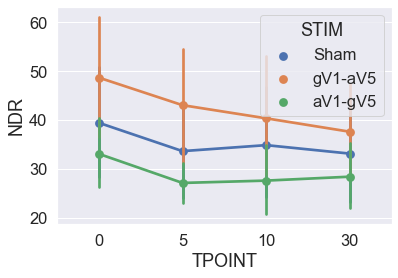

In [13]:
### Multi-way ANOVA

import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels
import pingouin as pg

NDR = pd.read_excel('Raw_NDR_3rdExp.xlsx', 'Sheet2')

NDR_G1_Ver = NDR['Verum_G1']
NDR_G1_Sh = NDR['Sham_G1']
NDR_G1_Ver = NDR_G1_Ver.drop(index=[3,5,8], inplace=False)
NDR_G1_Sh = NDR_G1_Sh.drop(index=[3,5,8], inplace=False)
NDR_G2_Ver = NDR['Verum_G2']
NDR_G2_Sh = NDR['Sham_G2']


ndr_basic = pd.concat([NDR_G5_Bsl, NDR_G4_Bsl, NDR_G3_Bsl,
                     NDR_G5_ACS, NDR_G4_ACS, NDR_G3_ACS,
                     NDR_G5_P10, NDR_G4_P10, NDR_G3_P10,
                     NDR_G5_P30, NDR_G4_P30, NDR_G3_P30], axis=0)
# print(ndr_basic)
ndr_basic = ndr_basic.reset_index(drop=True)

o = [number+1 for number in range(14)] #G3
a = [number+15 for number in range(15)] #G4
s = [number+30 for number in range(15)] #G5
subs = s+a+o+s+a+o+s+a+o+s+a+o
subj = pd.DataFrame(subs, columns=['ID']) 
subj = subj.reset_index(drop=True)

AG = ['aV1-gV5' for number in range(14)] #G3
GA = ['gV1-aV5' for number in range(15)] #G4
Sham = ['Sham' for number in range(15)] #G5
# IPh = ['InPhase' for number in range(14)] #G1
# APh = ['AntiPhase' for number in range(13)] #G2
# Sham = ['Sham' for number in range(15)] #G5
grouped = Sham+GA+AG+Sham+GA+AG+Sham+GA+AG+Sham+GA+AG
grou = pd.DataFrame(grouped, columns=['STIM']) 
grou = grou.reset_index(drop=True)
# print(grou)

Bs = [0 for number in range(44)] #'Bsl'
AC = [5 for number in range(44)] #'P10'
P1 = [10 for number in range(44)] #'P10'
P3 = [30 for number in range(44)] #'P30'
timepo = Bs+AC+P1+P3
tim = pd.DataFrame(timepo, columns=['TPOINT'])
tim = tim.reset_index(drop=True)
# print(tim)

behav = pd.concat([ndr_basic, grou, tim, subj], axis=1)
behav.rename(columns={0:'NDR'}, inplace=True)
# print(behav)
behav.to_csv('II_NDR_ANOVA.txt', sep='\t')

aov = pg.mixed_anova(dv='NDR', within='TPOINT', between='STIM', subject='ID', data=behav, correction=True)
print(aov.round(2))

import seaborn as sns
ax = sns.pointplot(x="TPOINT", y="NDR", hue="STIM", data=behav)

post = behav.pairwise_ttests(dv='NDR', within=['TPOINT'], between=['STIM'], subject='ID', interaction=1, padjust='bonf')
print(post)


/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


        Source     SS  DF1  DF2    MS     F  p-unc  p-GG-corr   np2   eps  \
0        GROUP   0.74    2   41  0.37  0.13   0.88        NaN  0.01   NaN   
1        TIMEP   0.49    2   82  0.24  0.20   0.82       0.82  0.00  0.96   
2  Interaction  10.34    4   82  2.58  2.12   0.09        NaN  0.09   NaN   

  sphericity  W-spher  p-spher  
0        NaN      NaN      NaN  
1       True     0.96     0.42  
2        NaN      NaN      NaN  
         Contrast TIMEP        A        B Paired  Parametric         T  \
0           TIMEP     -      Bsl     TP10   True        True -0.618139   
1           TIMEP     -      Bsl     TP30   True        True -0.477399   
2           TIMEP     -     TP10     TP30   True        True  0.043285   
3           GROUP     -  aV1-gV5  gV1-aV5  False        True  0.110956   
4           GROUP     -  aV1-gV5     Sham  False        True  0.472403   
5           GROUP     -  gV1-aV5     Sham  False        True  0.404410   
6   TIMEP * GROUP   Bsl  aV1-gV5  gV1-aV5

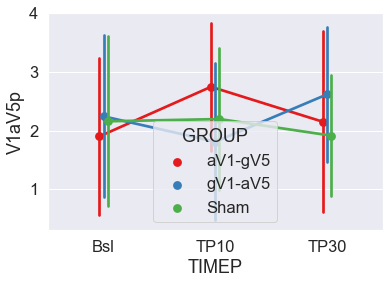

In [4]:
import seaborn as sns
import pandas as pd
import pingouin as pg

df1 = pd.read_csv('II_Mixed_mod_All_Raw.txt', sep=r'\s', header=0, 
                 names = ['NDR','SUBJECT','GROUP','TIMEP','PSDA','PSDB','PSDG',
                          'COHA','COHB','COHG','V1pV5a','V1aV5p','WPLIA','WPLIB','WPLIG',
                          'PSIT','PSIA','PSIB','PSIG','IMCOHA','IMCOHB','IMCOHG'])
df1.drop(df1.index[44:88,], inplace=True)
sns.set(font_scale=1.5)  # crazy big
ax = sns.pointplot(x="TIMEP", y="V1aV5p", hue="GROUP", data=df1, dodge=True, kind="point", ci="sd", palette="Set1")

aov = pg.mixed_anova(dv='V1aV5p', within='TIMEP', between='GROUP', subject='SUBJECT', data=df1, correction=True)
print(aov.round(2))
post = df1.pairwise_ttests(dv='V1aV5p', within=['TIMEP'], between=['GROUP'], subject='SUBJECT', interaction=1, padjust='bonf')
print(post)

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


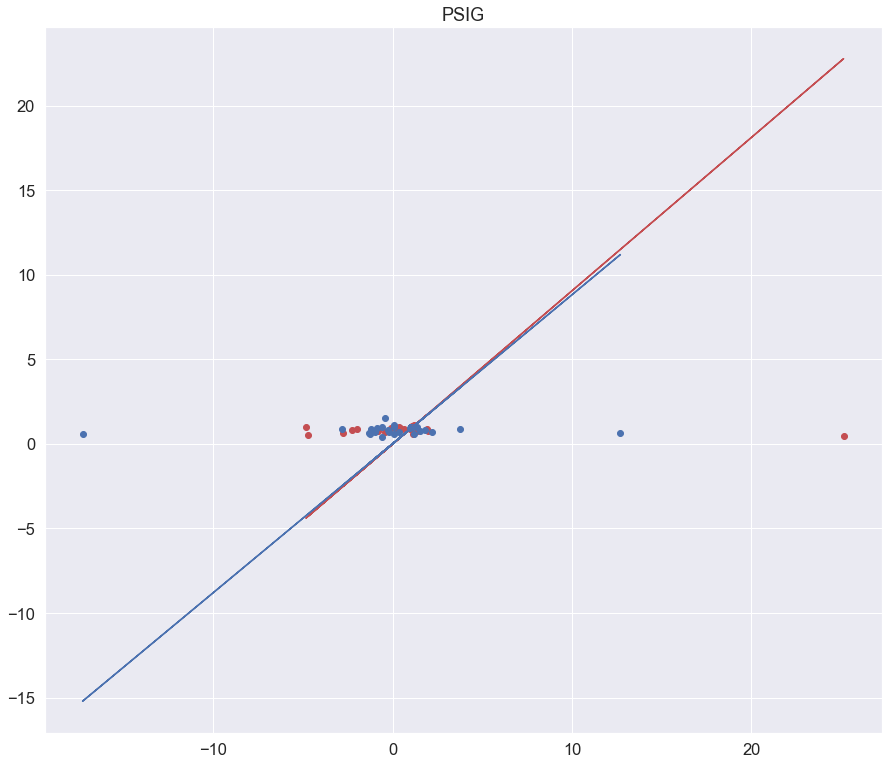

In [17]:
import pandas as pd
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

pd.set_option('display.max_rows', 200)
df2 = pd.read_csv('II_Mixed_mod_Prepro.txt', sep=r'\s', header=0, 
                 names = ['NDR','SUBJECT','GROUP','TIMEP','PSDA','PSDB','PSDG',
                          'COHA','COHB','COHG','V1pV5a','V1aV5p','WPLIA','WPLIB','WPLIG',
                          'PSIT','PSIA','PSIB','PSIG'])

# Drop all values corresponding to Sham
# df2.drop(df2[df2['GROUP']=='Sham'].index, inplace=True)
df2.dropna(inplace=True)
df2.reset_index(drop=True)
# print(df2)

### Define Target variables
G = df2.groupby('GROUP')

# Scatter plot for every feature

fig1 = plt.figure(figsize=(15.0, 13.0)) # Horizontal fig (3,1,x)
colors = ('r','b','g')

for co, gr in enumerate(G):
#     print(gr)
#     fig1.add_subplot(5,1,1)
#     plt.scatter(gr[1].iloc[:,4], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,5], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,6], gr[1]['NDR'], c=colors[c])
#     plt.title('PSD')
    
#     fig1.add_subplot(5,1,2)
#     plt.scatter(gr[1].iloc[:,7], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,8], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,9], gr[1]['NDR'], c=colors[c])
#     plt.title('COH')
    
#     fig1.add_subplot(5,1,3)
#     plt.scatter(gr[1].iloc[:,10], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,11], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,11], gr[1]['NDR'], c=colors[c])
#     plt.title('ZPAC')
    
#     fig1.add_subplot(1,5,4)
#     plt.scatter(gr[1].iloc[:,12], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,13], gr[1]['NDR'], c=colors[c])
    plt.scatter(gr[1].iloc[:,18], gr[1]['NDR'], c=colors[co])
    plt.title('PSIG')
    
    z = np.polynomial.polynomial.polyfit(gr[1].iloc[:,18], gr[1]['NDR'], 1)
    p = np.poly1d(z)
    plt.plot(gr[1].iloc[:,18],p(gr[1].iloc[:,18]),colors[co])
    
#     fig1.add_subplot(5,1,1)
#     plt.scatter(gr[1].iloc[:,4], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,5], gr[1]['NDR'], c=colors[c])
#     plt.scatter(gr[1].iloc[:,6], gr[1]['NDR'], c=colors[c])
#     plt.title('PSD')


#     model = AffinityPropagation(damping=0.9)
#     model.fit(gr[1].iloc[:,4+f], gr[1]['NDR'])

#     # assign a cluster to each example
#     yhat = model.predict(gr[1].iloc[:,4+f])
#     # retrieve unique clusters
#     clusters = unique(yhat)
#     for cluster in clusters:
#         # get row indexes for samples with this cluster
#         row_ix = where(yhat == cluster)
#         # create scatter of these samples
#         plt.scatter(gr[1].iloc[row_ix,4+f], gr[1]['NDR'][row_ix, 1])

plt.show()


# plt.scatter(X1_norm[])

In [32]:
        min_time = -1.5 #-1.5
        max_time = 2.5  #1.5
        num_time = 1000 #750
        timex = np.linspace(min_time, max_time, num_time)
        timex[413:430]

array([0.15365365, 0.15765766, 0.16166166, 0.16566567, 0.16966967,
       0.17367367, 0.17767768, 0.18168168, 0.18568569, 0.18968969,
       0.19369369, 0.1976977 , 0.2017017 , 0.20570571, 0.20970971,
       0.21371371, 0.21771772])

In [42]:
    # Lo Frequency Parameters
    timex = np.linspace(3, 15, 6)
    # Hi Frequency Parameters
    frex = np.linspace(22, 42, 5)
    print(timex,frex)

[ 3.   5.4  7.8 10.2 12.6 15. ] [22. 27. 32. 37. 42.]


In [3]:
    min_freq = 1#2
    max_freq = 99#42
    num_freq = 44#40
    frex = np.linspace(min_freq, max_freq, num_freq) 
    print(frex)

[ 1.          3.27906977  5.55813953  7.8372093  10.11627907 12.39534884
 14.6744186  16.95348837 19.23255814 21.51162791 23.79069767 26.06976744
 28.34883721 30.62790698 32.90697674 35.18604651 37.46511628 39.74418605
 42.02325581 44.30232558 46.58139535 48.86046512 51.13953488 53.41860465
 55.69767442 57.97674419 60.25581395 62.53488372 64.81395349 67.09302326
 69.37209302 71.65116279 73.93023256 76.20930233 78.48837209 80.76744186
 83.04651163 85.3255814  87.60465116 89.88372093 92.1627907  94.44186047
 96.72093023 99.        ]
